# **Ejercicio 1**
Contenido del dataset: Candidatos a púlsar obtenidos mediante la exploración HTRU. Los púlsares son un tipo de estrella, de considerable interés científico. Los candidatos deben estar clasificados en clases pulsar y no pulsar para facilitar el descubrimiento.
El ejercicio consiste obtener un modelo de clasificación para clasificar en pulsar (clase positiva) y no pulsar (clase negativa).
El dataset está en formato csv, contiene 8 atributos y la clase. No aparecen los nombres de los atributos en la primera línea del dataset. En el código suministrado se resuelve este problema.

*   URL: https://archive.ics.uci.edu/ml/datasets/HTRU2
*   URL Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip

**Tomando como base el ejemplo1 de los suministrados en clase**, implementar un clasificador basado en el descenso de gradiente estocástico (SGDClassifier), que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases están desbalanceadas,
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.
Utilizando el mismo dataset implementar clasificadores basados en Regresión Logística, SVM lineal y K vecinos más cercanos. Realizando

Toda la parte del descarga y preparación del dataset se suministra en este archivo.

In [1]:
import pandas as pd

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/HTRU2   este es bueno para usar en la práctica  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/

In [ ]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
unzip HTRU2.zip

Archive:  HTRU2.zip
  inflating: HTRU_2.csv              
  inflating: HTRU_2.arff             
  inflating: Readme.txt              


--2024-01-01 19:31:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘HTRU2.zip’

     0K .......... .......... .......... .......... ..........  531K
    50K .......... .......... .......... .......... .......... 1.23M
   100K .......... .......... .......... .......... .......... 5.92M
   150K .......... .......... .......... .......... .......... 1.24M
   200K .......... .......... .......... .......... .......... 6.31M
   250K .......... .......... .......... .......... .......... 28.7M
   300K .......... .......... .......... .......... .......... 39.3M
   350K .......... .......... .......... .......... .......... 1.34M
   400K .......... .......... .......... .......... .......... 45.4M
   450K .......... ..........

In [ ]:
htru2 = pd.read_csv("/content/HTRU_2.csv", header = 0, names = ["MEAN_IP", "SD_IP", "EK_IP", "S_IP", "MEAN_DN-SNR", "SD_DM-SNR", "EK_DM-SNR", "S_DM-SNR", "label"])
#Para añadir nombres a los atributos cuando no aparecen en el archivo csv

In [ ]:
htru2.head()

,MEAN_IP,SD_IP,EK_IP,S_IP,MEAN_DN-SNR,SD_DM-SNR,EK_DM-SNR,S_DM-SNR,label
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [ ]:
htru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEAN_IP      17897 non-null  float64
 1   SD_IP        17897 non-null  float64
 2   EK_IP        17897 non-null  float64
 3   S_IP         17897 non-null  float64
 4   MEAN_DN-SNR  17897 non-null  float64
 5   SD_DM-SNR    17897 non-null  float64
 6   EK_DM-SNR    17897 non-null  float64
 7   S_DM-SNR     17897 non-null  float64
 8   label        17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
htru2_labels = htru2["label"] #Guardamos etiquetas aparte

In [ ]:
htru2_data = htru2.drop("label", axis = 1) #Eliminamos la etiqueta

In [ ]:
htru2_labels = (htru2_labels == 1) #Cambiamos la etiqueta/clase de 0/1 a True/False

In [ ]:
htru2_labels.head()

0    False
1    False
2    False
3    False
4    False
Name: label, dtype: bool

In [ ]:
htru2_labels.value_counts() #Como se puede ver, las clases están desbalanceadas y habrá que tenerlo en cuenta

False    16258
True      1639
Name: label, dtype: int64

# **Un clasificador basado en el descenso de gradiente estocástico (SGDClassifier)**

In [ ]:
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.pipeline import make_pipeline #Para usar el pipe
from sklearn.linear_model import SGDClassifier #Para usar el clasificador SGD
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #Para particionar conjuntos de entrenamiento y test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(htru2_data, htru2_labels, stratify=htru2_labels, test_size = 0.20)
#stratify es para estratificar en función del objetivo y que los conjuntos estén balanceados.
#test_size indica el tamaño del conjunto de test, si no se indica es 0.25

In [ ]:
import collections
collections.Counter(y_test) #Para ver la frecuencia como se distribuye el y_test

Counter({False: 3252, True: 328})

In [ ]:
collections.Counter(y_train) #Para ver la frecuencia como se distribuye el y_train

Counter({False: 13006, True: 1311})

In [ ]:
sgd_clasificador = make_pipeline(StandardScaler(), SGDClassifier(random_state = 42))

In [ ]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
sgd_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Calculamos la predicción para el conjunto de test
y_pred = sgd_clasificador.predict(X_test)
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[3242,   10],
       [  86,  242]])

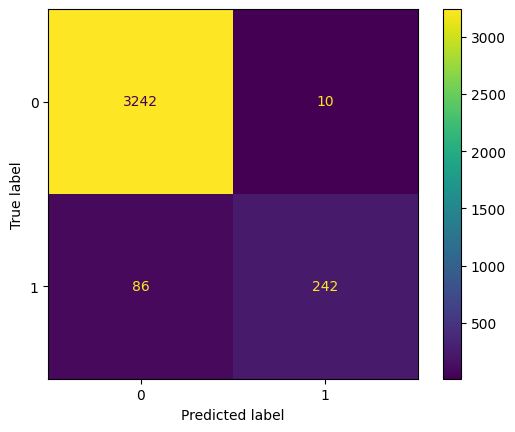

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, precision_recall_curve
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9731843575418995,
 0.9603174603174603,
 0.7378048780487805,
 0.8344827586206895)

In [ ]:
#Ahora vamos a ver la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score #para obtener la curva roc y su área
from sklearn.metrics import RocCurveDisplay

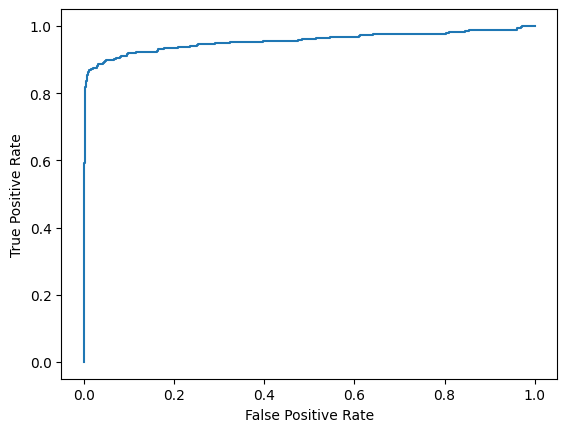

In [ ]:
y_score = sgd_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
#Solo recoge los dos primeros valores devueltos.
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.9545157951579516

In [ ]:
#Ahora vamos a crear la curva precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

**Summary:** as we have the data separated in attributes and labels (htru_data and htru_labels), first we split the data and labels in train and test subsets. Then, we made a pipeline containing the preprocessing method StandardScaler and the SGDC, we fit the pipeline to the data. finally we got the confusion matrix and the numerical metrics: accuracy, precision, recall, f1-score, and the graphical metrics: ROC-Curve and Precision-Recall-Curve.

## **Un Clasificador Basado en Regresión Logística**

In [ ]:
lr_clasificador = make_pipeline(StandardScaler(), LogisticRegression(random_state = 42))

In [ ]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
lr_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Calculamos la predicción para el conjunto de test
y_pred = lr_clasificador.predict(X_test)
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[3231,   21],
       [  51,  277]])

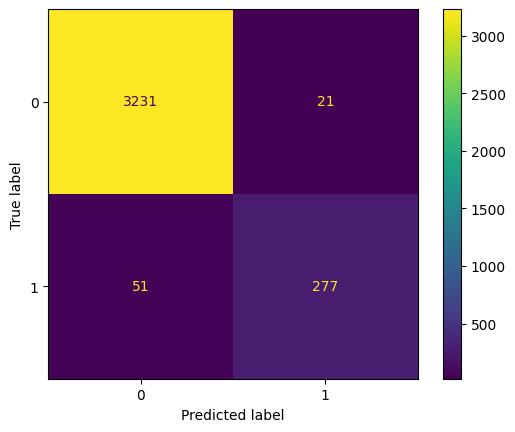

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9798882681564246,
 0.9295302013422819,
 0.8445121951219512,
 0.8849840255591054)

In [ ]:
#Ahora vamos a ver la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score #para obtener la curva roc y su área
from sklearn.metrics import RocCurveDisplay

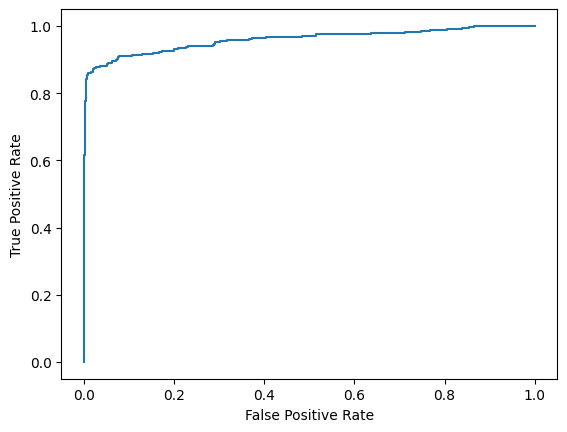

In [ ]:
y_score = lr_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr_clasificador.classes_[1])
#Solo recoge los dos primeros valores devueltos.
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.9591236537365374

In [ ]:
#Ahora vamos a crear la curva precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

# **Un Clasificador Basado en SVM**

In [ ]:
svc_clasificador = make_pipeline(StandardScaler(),  LinearSVC(random_state = 42))

In [ ]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
svc_clasificador.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Calculamos la predicción para el conjunto de test
y_pred = svc_clasificador.predict(X_test)
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[3234,   18],
       [  54,  274]])

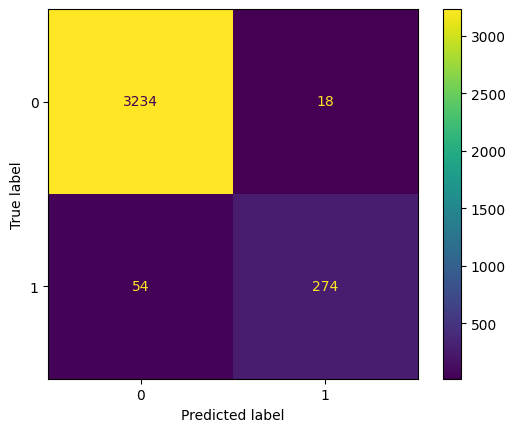

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9798882681564246,
 0.9383561643835616,
 0.8353658536585366,
 0.8838709677419353)

In [ ]:
#Ahora vamos a ver la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score #para obtener la curva roc y su área
from sklearn.metrics import RocCurveDisplay

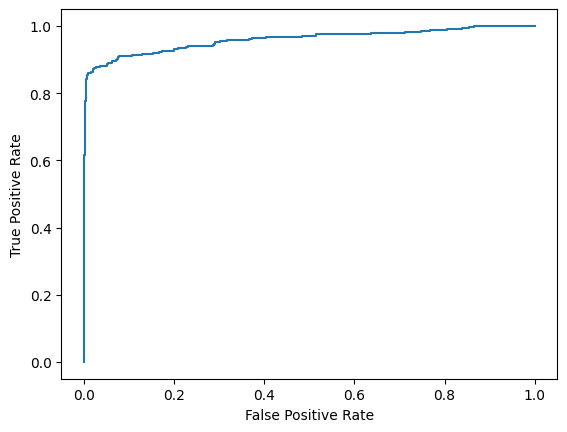

In [ ]:
y_score = svc_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=svc_clasificador.classes_[1])
#Solo recoge los dos primeros valores devueltos.
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.9591236537365374

In [ ]:
#Ahora vamos a crear la curva precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=svc_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

# **Un Clasificador Basado en KNN**

In [ ]:
knn_clasificador = make_pipeline(StandardScaler(),  KNeighborsClassifier())

In [ ]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
knn_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Calculamos la predicción para el conjunto de test
y_pred = knn_clasificador.predict(X_test)
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[3230,   22],
       [  56,  272]])

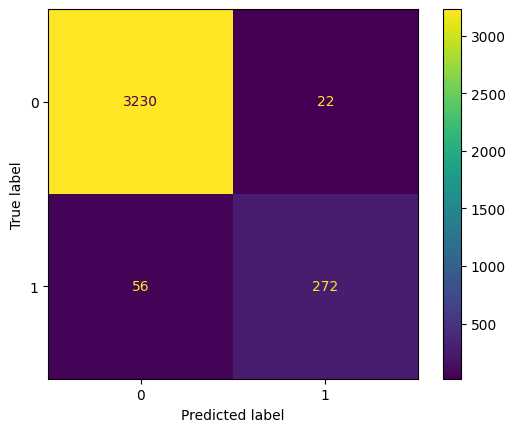

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9782122905027933,
 0.9251700680272109,
 0.8292682926829268,
 0.8745980707395499)

In [ ]:
#Ahora vamos a ver la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score #para obtener la curva roc y su área
from sklearn.metrics import RocCurveDisplay

In [ ]:
y_score = knn_clasificador.predict_proba(X_test)

In [ ]:
y_score[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

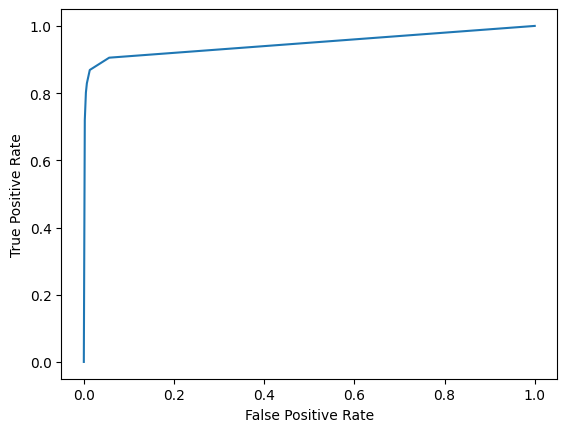

In [ ]:
y_score = knn_clasificador.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=knn_clasificador.classes_[1])
#Solo recoge los dos primeros valores devueltos.
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.9472083783337834

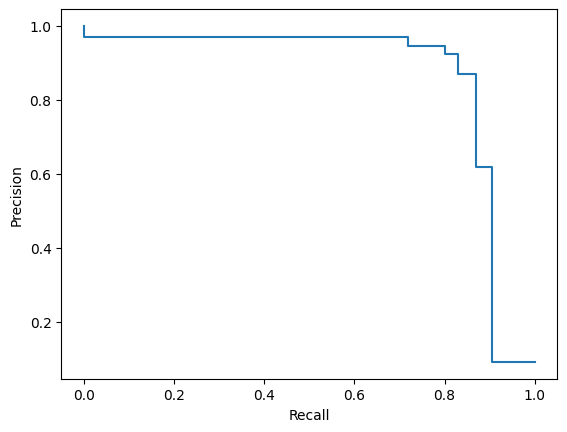

In [ ]:
#Ahora vamos a crear la curva precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=knn_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

# **Resumen**
En este cuaderno, aplicamos varios clasificadores: SGDC, Regresión Logística, SVM y KNN. En cada caso, creamos un pipeline con el preprocesamiento usando StandardScaler y el clasificador, luego ajustamos los datos de entrenamiento al pipeline. Después, utilizamos el modelo construido para predecir la clase del conjunto de prueba y calcular las métricas numéricas y gráficas requeridas.